### Here XRD data are visualized and analyzed 

In [1]:
from functions import *

sample = "mittma_0022_FR"
#path to the Data / Sample folder
folder = r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0022_Cu\XRD" 

#### Raw data treatment

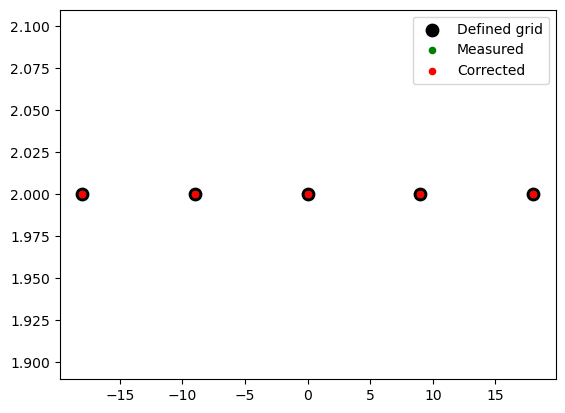

In [32]:
# grid = measurement_grid(5,5,34,34,-17,3) # BR_map 3mm margin (back sample)
# grid = measurement_grid(5,5,34,34,-17,-37) # FR_map 3mm margin (front sample)
#grid = measurement_grid(5,9,40,80,-20,-40) #  2 slow scans ( 2 center points)
grid = measurement_grid(5,1,36,1,-18,2)
# grid = measurement_grid(5,5,36,36,-18,-38)
# grid= measurement_grid(7,4, 6,3,-18,-17)

filename = "mittma_0022_bot_line_2Dmap.txt" 
#filename = "mittma_0017_GIXRD_5points.txt"
filename = os.path.join(folder, filename)


initial_data, coords = read_XRD(filename, grid, n = 0, separator = "\t")
plot_grid(coords,grid)

Raw data visualization and selection or translation

Coordinate -18.0,2.0                -9.0,2.0                0.0,2.0  \
Data type     2θ (°) Intensity, cps   2θ (°) Intensity, cps  2θ (°)   
0              20.00       7309.166    20.00       7146.131   20.00   
1              20.01       7248.091    20.01       7155.974   20.01   
2              20.02       7187.016    20.02       7165.817   20.02   
3              20.03       7137.488    20.03       7173.799   20.03   
4              20.04       7156.680    20.04       7223.577   20.04   
...              ...            ...      ...            ...     ...   
5996           79.96       1169.656    79.96       1180.572   79.96   
5997           79.97       1154.949    79.97       1183.555   79.97   
5998           79.98       1141.290    79.98       1186.325   79.98   
5999           79.99       1151.460    79.99       1199.318   79.99   
6000           80.00       1166.299    80.00       1213.467   80.00   

Coordinate                9.0,2.0                18.0,2.0                 
Data type  Intensity, cps  2θ (°) Intensity, cps   2θ (°) Intensity, cps  
0                7249.127   20.00       7233.203    20.00       23128.50  
1                7236.533   20.01       7180.521    20.01       23158.69  
2                7223.940   20.02       7127.840    20.02       23188.88  
3                7213.728   20.03       7085.119    20.03       23213.35  
4                7216.885   20.04       7130.403    20.04       23202.88  
...                   ...     ...            ...      ...            ...  
5996             1184.498   79.96       1153.409    79.96       13883.27  
5997             1171.983   79.97       1138.376    79.97       13880.29  
5998             1160.360   79.98       1124.414    79.98       13877.53  
5999             1159.014   79.99       1139.933    79.99       13848.95  
6000             1160.245   80.00       1160.940    80.00       13817.03  

[6001 rows x 10 columns]

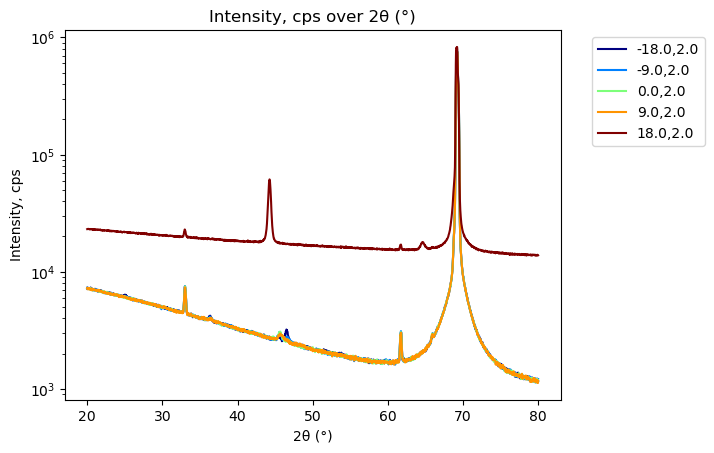

In [33]:
datatype_y= 'Intensity, cps'
datatype_x='2θ (°)'
plot_data(initial_data, datatype_x, datatype_y , plotscale = 'log')
display(initial_data)

# export_specific(initial_data, ['2θ (°)', 'Intensity, cps'], 17.0, 17.0, path=os.path.join(exp_path, sample+"_17_17.txt"))

In [34]:
# if you want to work only on a limited number of points 
which =initial_data.keys()[0:8]
data= initial_data[which]
display(data)

Coordinate -18.0,2.0                -9.0,2.0                0.0,2.0  \
Data type     2θ (°) Intensity, cps   2θ (°) Intensity, cps  2θ (°)   
0              20.00       7309.166    20.00       7146.131   20.00   
1              20.01       7248.091    20.01       7155.974   20.01   
2              20.02       7187.016    20.02       7165.817   20.02   
3              20.03       7137.488    20.03       7173.799   20.03   
4              20.04       7156.680    20.04       7223.577   20.04   
...              ...            ...      ...            ...     ...   
5996           79.96       1169.656    79.96       1180.572   79.96   
5997           79.97       1154.949    79.97       1183.555   79.97   
5998           79.98       1141.290    79.98       1186.325   79.98   
5999           79.99       1151.460    79.99       1199.318   79.99   
6000           80.00       1166.299    80.00       1213.467   80.00   

Coordinate                9.0,2.0                 
Data type  Intensity, cps  2θ (°) Intensity, cps  
0                7249.127   20.00       7233.203  
1                7236.533   20.01       7180.521  
2                7223.940   20.02       7127.840  
3                7213.728   20.03       7085.119  
4                7216.885   20.04       7130.403  
...                   ...     ...            ...  
5996             1184.498   79.96       1153.409  
5997             1171.983   79.97       1138.376  
5998             1160.360   79.98       1124.414  
5999             1159.014   79.99       1139.933  
6000             1160.245   80.00       1160.940  

[6001 rows x 8 columns]

In [36]:
# translate data if needed
data, coords = translate_data(initial_data, x=0, y=-20)
X,Y= extract_coordinates(data)
display(pd.DataFrame({'X':X, 'Y':Y}))
# MI_to_grid(data) #prints new coordinates

X     Y
0 -18.0 -18.0
1  -9.0 -18.0
2   0.0 -18.0
3   9.0 -18.0
4  18.0 -18.0

Remove the background and save processed data for future use

In [37]:
# display(initial_data)
# data=initial_data
print(data.columns)

MultiIndex([('-18.0,-18.0',         '2θ (°)'),
            ('-18.0,-18.0', 'Intensity, cps'),
            ( '-9.0,-18.0',         '2θ (°)'),
            ( '-9.0,-18.0', 'Intensity, cps'),
            (  '0.0,-18.0',         '2θ (°)'),
            (  '0.0,-18.0', 'Intensity, cps'),
            (  '9.0,-18.0',         '2θ (°)'),
            (  '9.0,-18.0', 'Intensity, cps'),
            ( '18.0,-18.0',         '2θ (°)'),
            ( '18.0,-18.0', 'Intensity, cps')],
           names=['Coordinate', 'Data type'])


In [38]:
#cut data to the region of interest

last_2theta= 63

col_theta = data.columns[data.columns.get_level_values(1)=='2θ (°)']
col_counts= data.columns[data.columns.get_level_values(1)=='Intensity, cps']
coords= data.columns.get_level_values(0).unique()
# print(col_theta)
columns= data.columns.get_level_values(1).unique()
for i in range(0,len(coords)):
    # print(data.columns.get_level_values(0).unique()[i])
    print(coords[i])
    # print(data[col_theta[i]])
    idx_last = np.where(data[col_theta[i]]>last_2theta)[0][0]
    print(idx_last)
    # data[col_theta[i]]= data[col_theta[i]].iloc[:idx_last]
    # data[col_counts[i]]= data[col_counts[i]].iloc[:idx_last]

data.drop(data.index[idx_last:], inplace=True)

display(data)

-18.0,-18.0
4301
-9.0,-18.0
4301
0.0,-18.0
4301
9.0,-18.0
4301
18.0,-18.0
4301


Coordinate -18.0,-18.0                -9.0,-18.0                0.0,-18.0  \
Data type       2θ (°) Intensity, cps     2θ (°) Intensity, cps    2θ (°)   
0                20.00       7309.166      20.00       7146.131     20.00   
1                20.01       7248.091      20.01       7155.974     20.01   
2                20.02       7187.016      20.02       7165.817     20.02   
3                20.03       7137.488      20.03       7173.799     20.03   
4                20.04       7156.680      20.04       7223.577     20.04   
...                ...            ...        ...            ...       ...   
4296             62.96       1761.820      62.96       1785.632     62.96   
4297             62.97       1765.414      62.97       1787.815     62.97   
4298             62.98       1770.763      62.98       1788.115     62.98   
4299             62.99       1774.797      62.99       1788.342     62.99   
4300             63.00       1769.785      63.00       1812.612     63.00   

Coordinate                9.0,-18.0                18.0,-18.0                 
Data type  Intensity, cps    2θ (°) Intensity, cps     2θ (°) Intensity, cps  
0                7249.127     20.00       7233.203      20.00       23128.50  
1                7236.533     20.01       7180.521      20.01       23158.69  
2                7223.940     20.02       7127.840      20.02       23188.88  
3                7213.728     20.03       7085.119      20.03       23213.35  
4                7216.885     20.04       7130.403      20.04       23202.88  
...                   ...       ...            ...        ...            ...  
4296             1730.208     62.96       1760.182      62.96       15413.70  
4297             1736.119     62.97       1767.857      62.97       15402.16  
4298             1742.639     62.98       1775.820      62.98       15388.11  
4299             1747.557     62.99       1781.826      62.99       15377.51  
4300             1758.621     63.00       1767.153      63.00       15440.59  

[4301 rows x 10 columns]

In [ ]:
#  preliminary finidng peaks 
# data= initial_data.copy() # un-comment if you want to work on original data
dataRangeMin = 0
dataRangeMax = len(data)
filterstrength = 10 # higher number = more noise is removed by the filter
peakprominence = 75 # higher number = only peaks with prominence above this value are considered
peakwidth = 20
 # higher number = wider peaks are considered

peaks, dataCorrected = initial_peaks(data, dataRangeMin, dataRangeMax, filterstrength,
                                         peakprominence, peakwidth,
                                         withplots = True, plotscale = 'linear')

In [ ]:
#  remove the background 
data_out = XRD_background(data,peaks, cut_range=1, order=4, withplots= True, Si_cut=True)

In [74]:
#  save clean data for future use 

# name = sample + "_clean.pkl"
name = "mittma_0022_FR_clean.pkl"

with (open(os.path.join(folder, name), "wb")) as openfile:
    pickle.dump(data, openfile)

In [41]:
to_add= 'mittma_0022_FR_bl_corner_clean.pkl'
with (open(os.path.join(folder, to_add), "rb")) as openfile:
    data_to_add = pickle.load(openfile)

In [46]:
data_tot= combine_data([data_out, data_to_add])
print(len(extract_coordinates(data_tot)[1]))
display(data_tot)

11


Coordinate -18.0,-18.0                                                  \
Data type       2θ (°) Intensity, cps   Background Corrected Intensity   
0                20.00       7309.166  7247.504239           68.631372   
1                20.01       7248.091  7245.094821          -13.074321   
2                20.02       7187.016  7242.685589          -59.419025   
3                20.03       7137.488  7240.276544          -78.625808   
4                20.04       7156.680  7237.867687          -78.917738   
...                ...            ...          ...                 ...   
4296             62.96            NaN  1563.089078          214.258644   
4297             62.97            NaN  1562.793159          202.989946   
4298             62.98            NaN  1562.497343          197.757628   
4299             62.99            NaN  1562.201629          201.538231   
4300             63.00            NaN  1561.906018          217.308294   

Coordinate -9.0,-18.0                                                  \
Data type      2θ (°) Intensity, cps   Background Corrected Intensity   
0               20.00       7146.131  7240.862881          -91.384560   
1               20.01       7155.974  7238.420967          -90.754849   
2               20.02       7165.817  7235.979324          -73.031536   
3               20.03       7173.799  7233.537953          -43.451827   
4               20.04       7223.577  7231.096855           -7.252924   
...               ...            ...          ...                 ...   
4296            62.96            NaN  1587.324944          184.911758   
4297            62.97            NaN  1587.112238          198.448501   
4298            62.98            NaN  1586.899770          209.640998   
4299            62.99            NaN  1586.687540          216.117412   
4300            63.00            NaN  1586.475549          215.505904   

Coordinate 0.0,-18.0                 ...  -14.0,-17.0                      \
Data type     2θ (°) Intensity, cps  ...   Background Corrected Intensity   
0              20.00       7249.127  ...  7189.740445         -102.939651   
1              20.01       7236.533  ...  7187.290985          -40.036771   
2              20.02       7223.940  ...  7184.841909           -0.996705   
3              20.03       7213.728  ...  7182.393218           18.848294   
4              20.04       7216.885  ...  7179.944911           24.165972   
...              ...            ...  ...          ...                 ...   
4296           62.96            NaN  ...  1624.466884          136.384058   
4297           62.97            NaN  ...  1624.340778          130.499881   
4298           62.98            NaN  ...  1624.215077          129.185181   
4299           62.99            NaN  ...  1624.089780          134.091568   
4300           63.00            NaN  ...  1623.964887          146.870650   

Coordinate -12.0,-17.0                                                  \
Data type       2θ (°) Intensity, cps   Background Corrected Intensity   
0                20.00       7219.956  7184.130173           38.454096   
1                20.01       7200.816  7181.689807            9.919715   
2                20.02       7181.676  7179.249835            1.652726   
3                20.03       7166.156  7176.810257            7.086793   
4                20.04       7191.075  7174.371072           19.655581   
...                ...            ...          ...                 ...   
4296             62.96            NaN  1626.986572          168.145817   
4297             62.97            NaN  1626.880018          168.365314   
4298             62.98            NaN  1626.773912          172.932134   
4299             62.99            NaN  1626.668255          182.634999   
4300             63.00            NaN  1626.563046          198.262630   

Coordinate -16.0,-14.0                                                  
Data type       2θ (°) Intensity, cps   Backgroun

### Analysis section

In [93]:
#  load clean data, if previously processed  
folder=r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0023_Cu\XRD"
sample= "mittma_0023_BL_2D"
name = sample + "_clean.pkl"
# name= "mittma_0022_FR_2D_clean.pkl"
with open(os.path.join(folder, name), "rb") as openfile:
    data_out = pickle.load(openfile) 

#  load refence spectra

ref_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XRD\ref_database\reflections"

with open(os.path.join(ref_path, "reflections.pkl"), 'rb') as f:
    ref_peaks_df = pickle.load(f)

display(ref_peaks_df["Cu7S4"])

Peak 2theta  Peak intensity    2theta             I
0      46.366366     2663.416020  20.00000  4.914470e-03
1      26.606607     1262.160376  20.06006  4.944681e-04
2      35.315315     1250.454561  20.12012  3.468491e-05
3      27.807808      954.075398  20.18018  1.696226e-06
4      41.681682      951.760624  20.24024  5.783195e-08
..           ...             ...       ...           ...
995          NaN             NaN  79.75976  1.840495e+01
996          NaN             NaN  79.81982  2.360568e+01
997          NaN             NaN  79.87988  3.334922e+01
998          NaN             NaN  79.93994  3.629028e+01
999          NaN             NaN  80.00000  2.875045e+01

[1000 rows x 4 columns]

#### Interactive plot to find possible phases

In [98]:


# x, y = extract_coordinates(data_out)
x,y = select_points(data_out, x_min=10)
print(x, y) 



[18. 18. 18. 18. 18.] [-18.  -9.   0.   9.  18.]


In [103]:
# plot_XRD_shift_plotly(data, datatype_x, datatype_y, shift, x, y, ref_peaks_df, ref_label="Reference", title=None)
fig= interactive_XRD_shift(data_out, '2θ (°)', 'Corrected Intensity', 10000, x,y, ref_peaks_df, title= sample +' errors at x=18')
fig.show()

In [ ]:
# plot_XRD_shift_plotly(data, datatype_x, datatype_y, shift, x, y, ref_peaks_df, ref_label="Reference", title=None)
fig= interactive_XRD_shift(data_out, '2θ (°)', 'Corrected Intensity', 400, x,y, ref_peaks_df, title= sample +' - 1D detector')
fig.show()

In [51]:
phase_A = [5,10]
phase_B = [23,24]
phase_C = [8,9,13,14,15,17, 18,19,20,22]
phase_D = [3,4,11,12,16,21]
phase_E = [1,2,6,7]
Cu8P2S = [25] 



# data_out=data_out[0]

[4, 9]
[22, 23]
[7, 8, 12, 13, 14, 16, 17, 18, 19, 21]
[2, 3, 10, 11, 15, 20]
[0, 1, 5, 6]
[24]


In [68]:
# save interactive plot fo future use

savepath= r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XRD" # change to your path
savepath = os.path.join(savepath, sample+"_interactive")
# fig.write_image(savepath+".png", scale=2) #scale sets the resolution here
        
fig.write_html(savepath+".html")

In [ ]:
new_x, new_y = select_points(data_out, y_min=-15)

interactive_XRD_shift(data_out, '2θ (°)', 'Corrected Intensity', 400, new_x, new_y, ref_peaks_df)

In [36]:
def export_specific(data, type, x, y, path): 
    'export a specific point in XY format in a .txt file'
    data_exp = get_data(data, type=type, x=x, y=y)
    data_exp.to_csv(path, sep='\t', index=False, header=False)
    display(data_exp)

#data_17_17 = get_data(data_out,type=['2θ (°)', 'Corrected Intensity'],  x= 17.0, y=17.0)
exp_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XRD\mittma_0019\data at specific points"
export_specific(data_out, ['2θ (°)', 'Corrected Intensity'], 17.0, 17.0, path=os.path.join(exp_path, sample+"_clean_17_17.txt"))
#display(get_data(data_out,  x= 17.0, y=17.0))

['2θ (°)', 'Corrected Intensity'] data at 17.0,17.0.


Data type  2θ (°)  Corrected Intensity
0           20.00           133.681364
1           20.01            74.071438
2           20.02            11.651380
3           20.03           -45.676710
4           20.04           -90.010735
...           ...                  ...
5996        79.96           -38.505613
5997        79.97           -26.547405
5998        79.98           -20.230212
5999        79.99           -23.819769
6000        80.00           -41.581811

[6001 rows x 2 columns]

#### Assign phases to different points

In [6]:
def assign_phases_numbers(data):
    """Function to assign phases to specific points in a dataset.  coords (list of tuples): List of coordinates available for selection.
    Returns:
        phase_info (dict): Dictionary where the key is the phase and the value is a list of 'yes'/'no'
                           corresponding to the presence of that phase at each coordinate.
    """
    coords= data.columns.get_level_values(0).unique()

    phase_info = {}  # Dictionary to store phase information for each point
    num_coords = len(coords)
    
    # Ask user for the phase name
    phase = input("What is the phase name? (or type 'exit' to finish): ").strip()
    if phase.lower() == 'exit':
        return phase_info  # Return empty dictionary if user exits

    # Determine if phase is present in most or few points
    presence_type = input("Is the phase present in most points or few points? (type 'most' or 'few'): ").strip().lower()

    # Initialize the presence array based on user input
    if presence_type == 'most':
        phase_present = [1] * num_coords  # Start with all points as 'yes'
    elif presence_type == 'few':
        phase_present = [0] * num_coords  # Start with all points as 'no'
    else:
        print("Invalid input. Please enter 'most' or 'few'.")

    # Display available points
    print("\nAvailable points (coordinates):")
    for i, coord in enumerate(coords):
        print(f"{i + 1}: {coord}")

    # Ask which points should be changed
    if presence_type == 'most':
        selected_points = input(f"\nWhich points should be set to 'no'? (Enter numbers separated by commas): ").strip()
        selected_indices = [int(idx.strip()) - 1 for idx in selected_points.split(',') if idx.strip().isdigit()]
        for idx in selected_indices:
            if 0 <= idx < num_coords:
                phase_present[idx] = 0
    else:  # presence_type == 'few'
        selected_points = input(f"\nWhich points should be set to 'yes'? (Enter numbers separated by commas): ").strip()
        selected_indices = [int(idx.strip()) - 1 for idx in selected_points.split(',') if idx.strip().isdigit()]
        for idx in selected_indices:
            if 0 <= idx < num_coords:
                phase_present[idx] = 1

    # Store this phase's information in the dictionary
    phase_info[phase] = phase_present
    print(f"\nPhase '{phase}' assigned to the selected points.")
    print(phase_info)
    
    return phase_info


In [18]:
def assign_phases_labels(data):
    """Function to assign phases to specific points in a dataset.
    Returns:
        phase_info (dict): Dictionary where the key is the phase and the value is a list of 'unknown' or the phase name
                           corresponding to the presence of that phase at each coordinate.
    """
    coords = data.columns.get_level_values(0).unique()

    phase_info = {}  # Dictionary to store phase information for each point
    num_coords = len(coords)
    
    # Ask user for the phase name
    phase = input("What is the phase name? (or type 'exit' to finish): ").strip()
    if phase.lower() == 'exit':
        return phase_info  # Return empty dictionary if user exits

    # Determine if phase is present in most or few points
    presence_type = input("Is the phase present in most points or few points? (type 'most' or 'few'): ").strip().lower()

    # Initialize the presence array based on user input
    if presence_type == 'most':
        phase_present = [phase] * num_coords  # Start with all points as the phase name
    elif presence_type == 'few':
        phase_present = ["unknown"] * num_coords  # Start with all points as 'unknown'
    else:
        print("Invalid input. Please enter 'most' or 'few'.")
        return phase_info

    # Display available points
    print("\nAvailable points (coordinates):")
    for i, coord in enumerate(coords):
        print(f"{i + 1}: {coord}")

    # Ask which points should be changed
    if presence_type == 'most':
        selected_points = input(f"\nWhich points should be set to 'unknown'? (Enter numbers separated by commas): ").strip()
        selected_indices = [int(idx.strip()) - 1 for idx in selected_points.split(',') if idx.strip().isdigit()]
        for idx in selected_indices:
            if 0 <= idx < num_coords:
                phase_present[idx] = "unknown"
    else:  # presence_type == 'few'
        selected_points = input(f"\nWhich points should be set to '{phase}'? (Enter numbers separated by commas): ").strip()
        selected_indices = [int(idx.strip()) - 1 for idx in selected_points.split(',') if idx.strip().isdigit()]
        for idx in selected_indices:
            if 0 <= idx < num_coords:
                phase_present[idx] = phase

    # Store this phase's information in the dictionary
    phase_info["Phase"] = phase_present
    print(f"\nPhase '{phase}' assigned to the selected points.")
    print(phase_info)
    
    return phase_info

In [20]:
def assign_phases_labels(data):
    """Function to assign phases to specific points in a dataset.
    Returns:
        phase_info (dict): Dictionary where the key is the phase and the value is a list of 'unknown', 'amorphous', or the phase name
                           corresponding to the presence of that phase at each coordinate.
    """
    coords = data.columns.get_level_values(0).unique()

    phase_info = {}  # Dictionary to store phase information for each point
    num_coords = len(coords)
    
    # Initialize the presence array with 'unknown'
    phase_present = ["unknown"] * num_coords

    # Ask user for the main phase name
    main_phase = input("What is the main phase present? (or type 'exit' to finish): ").strip()
    if main_phase.lower() == 'exit':
        phase_info["Phase"] = phase_present
        return phase_info  # Return the dictionary with 'unknown' if user exits

    # Assign the main phase to all points initially
    phase_present = [main_phase] * num_coords

    while True:
        # Ask if there is any other phase
        other_phase_response = input("Is there any other phase present? (yes/no): ").strip().lower()
        if other_phase_response == 'no':
            break

        # Ask user for the other phase name
        other_phase = input("What is the other phase name? (or type 'exit' to finish): ").strip()
        if other_phase.lower() == 'exit':
            break

        # Display available points
        print("\nAvailable points (coordinates):")
        for i, coord in enumerate(coords):
            print(f"{i + 1}: {coord}")

        # Ask which points should be set to the other phase
        selected_points = input(f"\nWhich points should be set to '{other_phase}'? (Enter numbers separated by commas): ").strip()
        selected_indices = [int(idx.strip()) - 1 for idx in selected_points.split(',') if idx.strip().isdigit()]
        for idx in selected_indices:
            if 0 <= idx < num_coords:
                phase_present[idx] = other_phase

    # Store this phase's information in the dictionary
    phase_info["Phase"] = phase_present
    print(f"\nPhase '{main_phase}' assigned to the remaining points.")
    print(phase_info)
    
    return phase_info

In [82]:
phase = "Cu7S4"
phase_info = assign_phases_labels(data_out)


Available points (coordinates):
1: -17.0,-17.0
2: -8.5,-17.0
3: 0.0,-17.0
4: 8.5,-17.0
5: 17.0,-17.0
6: -17.0,-8.5
7: -8.5,-8.5
8: 0.0,-8.5
9: 8.5,-8.5
10: 17.0,-8.5
11: -17.0,0.0
12: -8.5,0.0
13: 0.0,0.0
14: 8.5,0.0
15: 17.0,0.0
16: -17.0,8.5
17: -8.5,8.5
18: 0.0,8.5
19: 8.5,8.5
20: 17.0,8.5
21: -17.0,17.0
22: -8.5,17.0
23: 0.0,17.0
24: 8.5,17.0
25: 17.0,17.0

Available points (coordinates):
1: -17.0,-17.0
2: -8.5,-17.0
3: 0.0,-17.0
4: 8.5,-17.0
5: 17.0,-17.0
6: -17.0,-8.5
7: -8.5,-8.5
8: 0.0,-8.5
9: 8.5,-8.5
10: 17.0,-8.5
11: -17.0,0.0
12: -8.5,0.0
13: 0.0,0.0
14: 8.5,0.0
15: 17.0,0.0
16: -17.0,8.5
17: -8.5,8.5
18: 0.0,8.5
19: 8.5,8.5
20: 17.0,8.5
21: -17.0,17.0
22: -8.5,17.0
23: 0.0,17.0
24: 8.5,17.0
25: 17.0,17.0

Available points (coordinates):
1: -17.0,-17.0
2: -8.5,-17.0
3: 0.0,-17.0
4: 8.5,-17.0
5: 17.0,-17.0
6: -17.0,-8.5
7: -8.5,-8.5
8: 0.0,-8.5
9: 8.5,-8.5
10: 17.0,-8.5
11: -17.0,0.0
12: -8.5,0.0
13: 0.0,0.0
14: 8.5,0.0
15: 17.0,0.0
16: -17.0,8.5
17: -8.5,8.5
18: 0.0,8.5
19

In [67]:
def add_info(data, info_dict):
    """Function to add information to a dataset for each point."""
    info_type = list(info_dict.keys())[0]
    headerlength = len(data.columns.get_level_values(1).unique())
    coords= data.columns.get_level_values(0).unique()
    k=0
    new_data = data.copy()
    for i in range(0, len(coords)):
        #print(coords[i])
        new_df = pd.DataFrame([info_dict[info_type][i]], columns =[(coords[i], info_type)])
            
        new_data.insert(headerlength*(i+1)+k, "{}".format(data.columns.get_level_values(0).unique()[i]), new_df, allow_duplicates=True)
        new_data.rename(columns={'':  f'{info_type}'}, inplace = True)

        k=k+len(new_df.columns)
                
    new_frame = new_data.copy()

    return new_frame


In [85]:
labels= phase_info['Phase']
correct_info= labels[::-1]
correct_phase_info={'Phase': correct_info}
print(correct_phase_info)

{'Phase': ['Cu8P2S', 'phase B', 'phase B', 'phase C', 'phase D', 'phase C', 'phase C', 'phase C', 'phase C', 'phase D', 'phase C', 'phase C', 'phase C', 'phase D', 'phase D', 'phase A', 'phase C', 'phase C', 'phase E', 'phase E', 'phase A', 'phase D', 'phase D', 'phase E', 'phase E']}


In [86]:
new_df = add_info(data_out,correct_phase_info)
display(new_df)

Coordinate -17.0,-17.0                                                  \
Data type       2θ (°) Intensity, cps   Background Corrected Intensity   
0                20.00      7176.3740  7204.517941          -28.225527   
1                20.01      7210.7000  7198.964629          -85.761506   
2                20.02      6937.6310  7193.414732          -76.472525   
3                20.03      7126.5890  7187.868248          -25.190401   
4                20.04      7299.6830  7182.325176           43.253047   
...                ...            ...          ...                 ...   
5996             79.96       631.2200   649.330630          -79.091721   
5997             79.97       583.7899   648.967100          -81.056462   
5998             79.98       539.5801   648.603252          -83.893711   
5999             79.99       536.4910   648.239086          -87.614752   
6000             80.00       573.3471   647.874602          -92.230870   

Coordinate         -8.5,-17.0                                                  \
Data type    Phase     2θ (°) Intensity, cps   Background Corrected Intensity   
0           Cu8P2S      20.00      7122.4260  7199.010179           73.174431   
1              NaN      20.01      7446.3170  7193.416009           18.952957   
2              NaN      20.02      7249.6940  7187.825296           17.891338   
3              NaN      20.03      7233.8510  7182.238039           51.226405   
4              NaN      20.04      7092.0210  7176.654237          100.194990   
...            ...        ...            ...          ...                 ...   
5996           NaN      79.96       453.3904   600.144057         -129.378358   
5997           NaN      79.97       470.7132   599.790591         -125.819973   
5998           NaN      79.98       458.5576   599.436833         -119.616229   
5999           NaN      79.99       519.7892   599.082783         -112.522786   
6000           NaN      80.00       480.4080   598.728441         -106.295307   

Coordinate           ... 8.5,17.0                              \
Data type     Phase  ...   2θ (°) Intensity, cps   Background   
0           phase B  ...    20.00      7586.2770  7276.334012   
1               NaN  ...    20.01      7305.4590  7270.907143   
2               NaN  ...    20.02      7401.9990  7265.483462   
3               NaN  ...    20.03      7516.5450  7260.062968   
4               NaN  ...    20.04      7372.7290  7254.645660   
...             ...  ...      ...            ...          ...   
5996            NaN  ...    79.96       636.0993   629.467613   
5997            NaN  ...    79.97       622.2298   628.969141   
5998            NaN  ...    79.98       566.7548   628.470145   
5999            NaN  ...    79.99       639.3231   627.970626   
6000            NaN  ...    80.00       509.7785   627.470584   

Coordinate                              17.0,17.0                              \
Data type  Corrected Intensity    Phase    2θ (°) Intensity, cps   Background   
0                   240.059987  phase E     20.00      7309.2470  7354.201258   
1                   197.335536      NaN     20.01      7404.6680  7348.846321   
2                   145.350487      NaN     20.02      7479.3140  7343.494511   
3                    91.735149      NaN     20.03      7351.3040  7338.145827   
4                    44.119831      NaN     20.04      7577.4370  7332.800268   
...                        ...      ...       ...            ...          ...   
5996                -15.231581      NaN     79.96       692.0968   740.141511   
5997                -12.598941      NaN     79.97       707.4510   739.642842   
5998                -20.554866      NaN     79.98       702.2582   739.143649   
5999                -45.459119      NaN     79.99       681.2984   738.643934   
6000                -93.671460      NaN     80.00       573.7144   738.143695   

Coordinate                               
Data type  Corrected Intensity    Phase  

In [87]:
with open(os.path.join(folder, sample+"_phases.pkl"), "wb") as openfile:
# with open(os.path.join(folder, sample+"_mock_phases.pkl"), "wb") as openfile:
    pickle.dump(new_df, openfile)

In [29]:
savepath= r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XRD" 
new_heatmap(datatype='Cu7S4', data=new_df,savepath= os.path.join(savepath,"mittma_0019_BR_Cu7S4_map.png"), title=f"Cu7S4 in {sample}")

#### Fit specific peaks 

In [ ]:
# define peak position to analyze, and fit the peak with two pseudovoigts (ka1, ka2)
peak_position = 27.75
df_first_peak = fit_this_peak(data_out, peak_position, 1, withplots = True, printinfo = False)

In [ ]:
#  plot info from peak fitting in a heatmap

list_to_plot = ["Center", "Amplitude", "FWHM", "Fraction"]
plots_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XRD\mittma_0019" # change to your path
for item in list_to_plot:
    savepath = os.path.join(plots_path, f'{sample}_{peak_position}_{item}.png')
  
    new_heatmap(item, data= df_first_peak, title =  sample + f' peak at 2θ= {peak_position}° - ' + item, 
                savepath = savepath
                )

In [ ]:
# if you want to look at specific point in the dataset you can call them with plot_data
plt.figure(figsize=(7, 5))
x=[0,0]
y=[20,-20]

plot_data(df_first_peak, 'range 2θ', 'Fit', x,y, plotscale = 'linear')
plot_data(df_first_peak, 'range 2θ', 'range Intensity',x,y, legend =False, scatter_plot=False,  plotscale = 'linear' )
#plt.savefig(os.path.join(plots_path, "mittma_00015_FR_second_peak_weid points.png"))

In [ ]:
# ------------------- calculate shift from reference -------------------

ref_peak_pos = 27.807808

data= df_first_peak.copy()
dat_center = data.iloc[:,data.columns.get_level_values(1)=='Center']
dat_center = dat_center.dropna()
shift = dat_center.values - ref_peak_pos

data = math_on_columns(data, 'Center', type2= ref_peak_pos, operation = "-")
data.rename(columns={'Center - 28.228228':'Center - Reference'}, inplace = True)

### try to integrate with EDX data for the same sample

In [71]:
EDS_pickle_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\mittma_pickles"
with open(os.path.join(EDS_pickle_path, "mittma_0022_EDS.pkl"), "rb") as openfile:
    EDS_data = pickle.load(openfile)

display(EDS_data)

Coordinate 4.4399999999999995,2.34                          \
Data type    Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                            100.0                    4.33   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                           98.43               9.14              19.59   

Coordinate                               4.4399999999999995,9.59  \
Data type  Layer 1 Cu Atomic % Sample ID   Substrate Si Atomic %   
0                        71.27        22                   100.0   

Coordinate                                                 ...  \
Data type  Layer 1 Density (g/cm³) Layer 1 Thickness (nm)  ...   
0                             4.33                 110.08  ...   

Coordinate -5.199999999999999,30.22                                \
Data type        Layer 1 S Atomic % Layer 1 Cu Atomic % Sample ID   
0                              19.4               71.55        22   

Coordinate -5.199999999999999,37.09                          \
Data type     Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                             100.0                    4.33   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                          140.55               8.19              19.29   

Coordinate                                
Data type  Layer 1 Cu Atomic % Sample ID  
0                        72.53        22  

[1 rows x 672 columns]

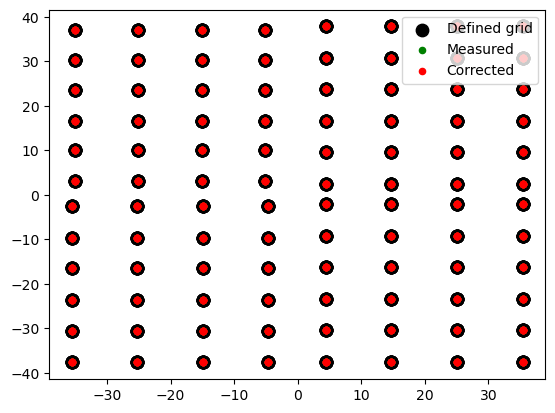

In [25]:
grid = MI_to_grid(EDS_data)
plot_grid(grid,grid)

In [72]:
new_x, new_y = select_points(EDS_data, y_min=-40, x_min=-10, x_max =40, y_max=10)
new_coords = list(('{},{}').format(x,y) for x,y in zip(new_x, new_y))
#display(new_coords)

EDS_FR, coords = translate_data(EDS_data[new_coords], x=-20, y=20)
display(EDS_FR)

Coordinate          -15.56,22.34                          \
Data type  Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                          100.0                    4.33   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                           98.43               9.14              19.59   

Coordinate                                        -15.56,29.59  \
Data type  Layer 1 Cu Atomic % Sample ID Substrate Si Atomic %   
0                        71.27      22.0                 100.0   

Coordinate                                                 ...  \
Data type  Layer 1 Density (g/cm³) Layer 1 Thickness (nm)  ...   
0                             4.33                 110.08  ...   

Coordinate         -25.2,23.1                                \
Data type  Layer 1 S Atomic % Layer 1 Cu Atomic % Sample ID   
0                       17.42               71.56      22.0   

Coordinate           -25.2,29.98                          \
Data type  Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                          100.0                    4.33   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                          102.29               9.96              18.01   

Coordinate                                
Data type  Layer 1 Cu Atomic % Sample ID  
0                        72.03      22.0  

[1 rows x 280 columns]

In [73]:
#interpolate EDS data to the same grid as XRD data
grid = measurement_grid(5,5,34,34,-17,-17) # BR_map 3mm margin
EDS_interp = interpolate_grid(EDS_FR, grid)
get_data(EDS_interp, x=0, y=0)
print(EDS_interp.columns.get_level_values(0).unique())

All data at 0,0.
Index(['-17.0,-17.0', '-17.0,-8.5', '-17.0,0.0', '-17.0,8.5', '-17.0,17.0',
       '-8.5,-17.0', '-8.5,-8.5', '-8.5,0.0', '-8.5,8.5', '-8.5,17.0',
       '0.0,-17.0', '0.0,-8.5', '0.0,0.0', '0.0,8.5', '0.0,17.0', '8.5,-17.0',
       '8.5,-8.5', '8.5,0.0', '8.5,8.5', '8.5,17.0', '17.0,-17.0', '17.0,-8.5',
       '17.0,0.0', '17.0,8.5', '17.0,17.0'],
      dtype='object', name='Coordinate')


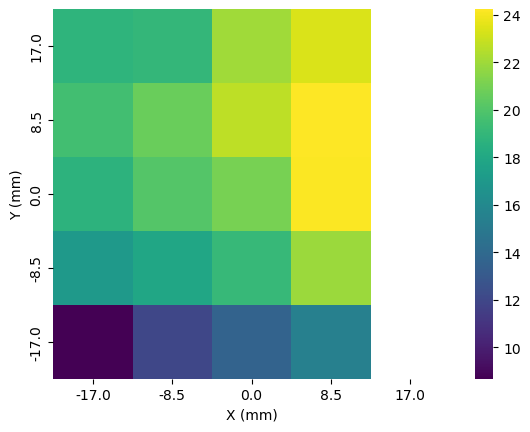

In [74]:
heatmap( data= EDS_interp, datatype= "Layer 1 S Atomic %")

In [29]:
get_data(EDS_interp, x=8.5, y=8.5)

All data at 8.5,8.5.


Data type  Substrate Si Atomic %  Layer 1 Density (g/cm³)  \
0                          100.0                  4.30075   

Data type  Layer 1 Thickness (nm)  Layer 1 P Atomic %  Layer 1 S Atomic %  \
0                      103.637903            4.982609            24.24429   

Data type  Layer 1 Cu Atomic %  Sample ID  
0                     70.77342       22.0

In [88]:
data_combined = combine_data((new_df, EDS_interp))
display(data_combined)

Coordinate -17.0,-17.0                                                  \
Data type       2θ (°) Intensity, cps   Background Corrected Intensity   
0                20.00      7176.3740  7204.517941          -28.225527   
1                20.01      7210.7000  7198.964629          -85.761506   
2                20.02      6937.6310  7193.414732          -76.472525   
3                20.03      7126.5890  7187.868248          -25.190401   
4                20.04      7299.6830  7182.325176           43.253047   
...                ...            ...          ...                 ...   
5996             79.96       631.2200   649.330630          -79.091721   
5997             79.97       583.7899   648.967100          -81.056462   
5998             79.98       539.5801   648.603252          -83.893711   
5999             79.99       536.4910   648.239086          -87.614752   
6000             80.00       573.3471   647.874602          -92.230870   

Coordinate         -8.5,-17.0                                                  \
Data type    Phase     2θ (°) Intensity, cps   Background Corrected Intensity   
0           Cu8P2S      20.00      7122.4260  7199.010179           73.174431   
1              NaN      20.01      7446.3170  7193.416009           18.952957   
2              NaN      20.02      7249.6940  7187.825296           17.891338   
3              NaN      20.03      7233.8510  7182.238039           51.226405   
4              NaN      20.04      7092.0210  7176.654237          100.194990   
...            ...        ...            ...          ...                 ...   
5996           NaN      79.96       453.3904   600.144057         -129.378358   
5997           NaN      79.97       470.7132   599.790591         -125.819973   
5998           NaN      79.98       458.5576   599.436833         -119.616229   
5999           NaN      79.99       519.7892   599.082783         -112.522786   
6000           NaN      80.00       480.4080   598.728441         -106.295307   

Coordinate           ...           17.0,8.5                                \
Data type     Phase  ... Layer 1 S Atomic % Layer 1 Cu Atomic % Sample ID   
0           phase B  ...                NaN                 NaN       NaN   
1               NaN  ...                NaN                 NaN       NaN   
2               NaN  ...                NaN                 NaN       NaN   
3               NaN  ...                NaN                 NaN       NaN   
4               NaN  ...                NaN                 NaN       NaN   
...             ...  ...                ...                 ...       ...   
5996            NaN  ...                NaN                 NaN       NaN   
5997            NaN  ...                NaN                 NaN       NaN   
5998            NaN  ...                NaN                 NaN       NaN   
5999            NaN  ...                NaN                 NaN       NaN   
6000            NaN  ...                NaN                 NaN       NaN   

Coordinate             17.0,17.0                          \
Data type  Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                            NaN                     NaN   
1                            NaN                     NaN   
2                            NaN                     NaN   
3                            NaN                     NaN   
4                            NaN                     NaN   
...                          ...                     ...   
5996                         NaN                     NaN   
5997                         NaN                     NaN   
5998                         NaN                     NaN   
5999                         NaN                     NaN   
6000                         NaN                     NaN   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                             NaN                N

In [31]:
get_data(data_combined, x=0, y=0)

All data at 0,0.


Data type  2θ (°) Intensity, cps   Background  Corrected Intensity    Phase  \
0           20.00       7167.236  7141.466447            54.639523  phase C   
1           20.01       7360.691  7135.998841           160.113133        -   
2           20.02       7284.749  7130.534545           185.137181        -   
3           20.03       7323.341  7125.073558           154.740845        -   
4           20.04       7112.015  7119.615878            93.953306        -   
...           ...            ...          ...                  ...      ...   
5996        79.96       545.9869   585.002923           -73.634175        -   
5997        79.97       468.7814   584.622386           -80.969052        -   
5998        79.98       480.4896   584.241495           -72.812427        -   
5999        79.99       585.0758   583.860250           -40.856672        -   
6000        80.00       595.4599   583.478651            23.205843        -   

Data type Substrate Si Atomic % Layer 1 Density (g/cm³)  \
0                         100.0                4.300239   
1                             -                       -   
2                             -                       -   
3                             -                       -   
4                             -                       -   
...                         ...                     ...   
5996                          -                       -   
5997                          -                       -   
5998                          -                       -   
5999                          -                       -   
6000                          -                       -   

Data type Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %  \
0                       89.12319           7.350378          21.047101   
1                              -                  -                  -   
2                              -                  -                  -   
3                              -                  -                  -   
4                              -                  -                  -   
...                          ...                ...                ...   
5996                           -                  -                  -   
5997                           -                  -                  -   
5998                           -                  -                  -   
5999                           -                  -                  -   
6000                           -                  -                  -   

Data type Layer 1 Cu Atomic % Sample ID  
0                   71.601302      22.0  
1                           -         -  
2                           -         -  
3                           -         -  
4                           -         -  
...                       ...       ...  
5996                        -         -  
5997                        -         -  
5998                        -         -  
5999                        -         -  
6000                        -         -  

[6001 rows x 12 columns]

In [89]:
XRD_pickles_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XRD"

with open(os.path.join(XRD_pickles_path, sample+"_phases_coords.pkl"), "wb") as openfile:
    pickle.dump(data_combined, openfile)

In [90]:
x,y = extract_coordinates(data_combined)
labels= get_data(data_combined, 'Phase').loc[0].values

# labels = labels[::-1]

df_to_plot= pd.DataFrame({'X':x, 'Y':y, 'Phase':labels})
import plotly.express as px
fig= px.scatter(df_to_plot, x='X', y='Y', color='Phase', title= sample,
                width=400, height=400)
fig.update_traces(marker=dict(size=20))

fig.write_image(os.path.join(XRD_pickles_path, sample+"_phases_coords.png"), scale=2)
fig.show()

# plt.scatter(x, y, c=colors, cmap=ListedColormap(colors))


Phase data at all coordinates.


In [91]:
display(df_to_plot)

X     Y    Phase
0  -17.0 -17.0   Cu8P2S
1   -8.5 -17.0  phase B
2    0.0 -17.0  phase B
3    8.5 -17.0  phase C
4   17.0 -17.0  phase D
5  -17.0  -8.5  phase C
6   -8.5  -8.5  phase C
7    0.0  -8.5  phase C
8    8.5  -8.5  phase C
9   17.0  -8.5  phase D
10 -17.0   0.0  phase C
11  -8.5   0.0  phase C
12   0.0   0.0  phase C
13   8.5   0.0  phase D
14  17.0   0.0  phase D
15 -17.0   8.5  phase A
16  -8.5   8.5  phase C
17   0.0   8.5  phase C
18   8.5   8.5  phase E
19  17.0   8.5  phase E
20 -17.0  17.0  phase A
21  -8.5  17.0  phase D
22   0.0  17.0  phase D
23   8.5  17.0  phase E
24  17.0  17.0  phase E